##Introduction

**Context**

Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

**Data**

This [dataset](https://www.kaggle.com/andrewmvd/fetal-health-classification) contains 2126 records of 21 features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

- Normal
- Suspect
- Pathological

**Features**

- 'baseline value' FHR baseline (beats per minute)
- 'accelerations' Number of accelerations per second
- 'fetal_movement' Number of fetal movements per second
- 'uterine_contractions' Number of uterine contractions per second
- 'light_decelerations' Number of light decelerations per second
- 'severe_decelerations' Number of severe decelerations per second
- 'prolongued_decelerations' Number of prolonged decelerations per second
- 'abnormal_short_term_variability' Percentage of time with abnormal short term - variability
- 'mean_value_of_short_term_variability' Mean value of short term variability
- 'percentage_of_time_with_abnormal_long_term_variability' Percentage of time - with abnormal long term variability
- 'mean_value_of_long_term_variability' Mean value of long term variability
- 'histogram_width' Width of FHR histogram
- 'histogram_min' Minimum (low frequency) of FHR histogram
- 'histogram_max' Maximum (high frequency) of FHR histogram
- 'histogram_number_of_peaks' Number of histogram peaks
- 'histogram_number_of_zeroes' Number of histogram zeros
- 'histogram_mode' Histogram mode
- 'histogram_mean' Histogram mean
- 'histogram_median' Histogram median
- 'histogram_variance' Histogram variance
- 'histogram_tendency' Histogram tendency

**Target**

- 'fetal_health' Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

*Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318*

##Loading and preparing the dataset

In [ ]:
library(readr)
install.packages("caret")
library(caret)
install.packages("rpart")
library(rpart)
install.packages("rpart.plot")
library(rpart.plot)
install.packages("randomForest")
library(randomForest)
install.packages("UBL")
library(UBL)

In [ ]:
myfile <- "https://raw.githubusercontent.com/gobrac/datasets/main/fetal_health.csv"

fetal_health <- read_csv(myfile)
fetal_health$fetal_health =as.factor(fetal_health$fetal_health)

head(fetal_health)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double()
)
ℹ Use `spec()` for the full column specifications.




baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,⋯,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
120,0.000,0,0.000,0.000,0,0.000,73,0.5,43,⋯,62,126,2,0,120,137,121,73,1,2
132,0.006,0,0.006,0.003,0,0.000,17,2.1,0,⋯,68,198,6,1,141,136,140,12,0,1
133,0.003,0,0.008,0.003,0,0.000,16,2.1,0,⋯,68,198,5,1,141,135,138,13,0,1
134,0.003,0,0.008,0.003,0,0.000,16,2.4,0,⋯,53,170,11,0,137,134,137,13,1,1
132,0.007,0,0.008,0.000,0,0.000,16,2.4,0,⋯,53,170,9,0,137,136,138,11,1,1
134,0.001,0,0.010,0.009,0,0.002,26,5.9,0,⋯,50,200,5,3,76,107,107,170,0,3


In [ ]:
#str(fetal_health)
summary(fetal_health)

 baseline value  accelerations      fetal_movement     uterine_contractions
 Min.   :106.0   Min.   :0.000000   Min.   :0.000000   Min.   :0.000000    
 1st Qu.:126.0   1st Qu.:0.000000   1st Qu.:0.000000   1st Qu.:0.002000    
 Median :133.0   Median :0.002000   Median :0.000000   Median :0.004000    
 Mean   :133.3   Mean   :0.003178   Mean   :0.009481   Mean   :0.004366    
 3rd Qu.:140.0   3rd Qu.:0.006000   3rd Qu.:0.003000   3rd Qu.:0.007000    
 Max.   :160.0   Max.   :0.019000   Max.   :0.481000   Max.   :0.015000    
 light_decelerations severe_decelerations prolongued_decelerations
 Min.   :0.000000    Min.   :0.000e+00    Min.   :0.0000000       
 1st Qu.:0.000000    1st Qu.:0.000e+00    1st Qu.:0.0000000       
 Median :0.000000    Median :0.000e+00    Median :0.0000000       
 Mean   :0.001889    Mean   :3.293e-06    Mean   :0.0001585       
 3rd Qu.:0.003000    3rd Qu.:0.000e+00    3rd Qu.:0.0000000       
 Max.   :0.015000    Max.   :1.000e-03    Max.   :0.0050000       

In [ ]:
set.seed(1)
trainIndex <- createDataPartition(fetal_health$fetal_health , p = .7,
                                  list = FALSE,
                                  times = 1)
Train <- data.frame(fetal_health [ trainIndex,])
Test <- data.frame(fetal_health [-trainIndex,])

In [ ]:
Evaluate = function(Table){ 
  evaluation1 <- matrix(list(), nrow=3, ncol=3)

  rownames(evaluation1) <- c("class 1", "class 2", "class 3")
  colnames(evaluation1) <- c("Precision", "Recall", "F1 score")

  evaluation1[[1,1]] = Table[1] / sum(Table[,1])      # Precision: TP/(TP+FP)  
  evaluation1[[2,1]] = Table[5] / sum(Table[,2])      # Precision: TP/(TP+FP)  
  evaluation1[[3,1]] = Table[9] / sum(Table[,3])      # Precision: TP/(TP+FP)

  evaluation1[[1,2]] = Table[1] / sum(Table[1,])      # Recall: TP/(TP+FN)
  evaluation1[[2,2]] = Table[5] / sum(Table[2,])      # Recall: TP/(TP+FN)
  evaluation1[[3,2]] = Table[9] / sum(Table[3,])      # Recall: TP/(TP+FN)

  evaluation1[[1,3]] = 2*(evaluation1[[1,1]] * evaluation1[[1,2]] /  (evaluation1[[1,1]] + evaluation1[[1,2]]))   # F1 score: 2*(Precisio*Recall)/(Precision+Recall)  
  evaluation1[[2,3]] = 2*(evaluation1[[2,1]] * evaluation1[[2,2]] /  (evaluation1[[2,1]] + evaluation1[[2,2]]))   # F1 score: 2*(Precisio*Recall)/(Precision+Recall)
  evaluation1[[3,3]] = 2*(evaluation1[[3,1]] * evaluation1[[3,2]] /  (evaluation1[[3,1]] + evaluation1[[3,2]]))   # F1 score: 2*(Precisio*Recall)/(Precision+Recall)

  accuracy_Test <- sum(diag(Table)) / sum(Table)

  print(evaluation1)
  
  print(paste0("accuracy: ", accuracy_Test ))

}

In [ ]:
dim(Train)
dim(Test)

prop.table(table(Train$fetal_health))
prop.table(table(Test$fetal_health))

[1] 1490   22

[1] 636  22


         1          2          3 
0.77785235 0.13892617 0.08322148 


         1          2          3 
0.77987421 0.13836478 0.08176101 

# Treating unbalanced data

In [ ]:
table(Train$fetal_health)


   1    2    3 
1159  207  124 

SMOTE algorithm [Nitesh Chawla, et al. (2002)](https://www.jair.org/index.php/jair/article/view/10302/24590) is ran to artificially generate new examples of the minority class (class 3) using the K-nearest neighbors ($K = 5$ by default):

- Step 1: For each $x \in A$ (the minority class), the k-nearest neighbors of x are obtained by calculating the Euclidean distance between x and every other sample in set A.
- Step 2: For each $x \in A$, n examples are randomly selected from its k-nearest neighbors, and they construct the set $A_1$ .
- Step 3: For each example $x_k \in A_1$ (k=1, 2, 3…N), the following formula is used to generate a new example:
$x' = x + rand(0, 1) * \mid x - x_k \mid$ in which rand(0, 1) represents the random number between 0 and 1. (in other words: computes a line between the minority data points and any of its neighbors and places a synthetic point somewhere the middle.)

Furthermore, the majority class (class 1) is also under-sampled, leading to a  balanced dataset.




In [ ]:
set.seed(1)
Train = data.frame(Train)


Train <- SmoteClassif(fetal_health ~ ., Train, list("3" = 1.67, "1"= 0.1787))
table(Train$fetal_health)


  1   2   3 
207 207 207 

#Decision Tree (rpart)
By default, rpart uses gini impurity to select splits when performing classification


$ G_i = 1 -   \sum_{k=1}^{k} (p_{i})^2 $

Where

$p_{i}$ is the ratio of class k instances among the training instances in the $i^{th}$ node (denotes the probability of an element being classified for each distinct class.)

##CART training algorithm
the algorithm searches for a single feature and its threashold that produce the purest subsets (weighted by their size). The cost function that the algorithm tries to minimize is:

$J (k,t_k)=  \frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m} G_{right}$

Where:
- $G_{left/right}$ measures the impurity of the left/right subset
- $m_{left/right}$ is the number of instances in the left/right subset

Once it has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets and so on, recursively

n= 621 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 621 414 1 (0.33333333 0.33333333 0.33333333)  
   2) histogram_median>=125.8604 443 243 2 (0.40406321 0.45146727 0.14446953)  
     4) percentage_of_time_with_abnormal_long_term_variability< 7.5 193  45 1 (0.76683938 0.19170984 0.04145078)  
       8) accelerations>=0.0015 112   5 1 (0.95535714 0.04464286 0.00000000) *
       9) accelerations< 0.0015 81  40 1 (0.50617284 0.39506173 0.09876543)  
        18) histogram_mean< 148.5 60  19 1 (0.68333333 0.21666667 0.10000000)  
          36) prolongued_decelerations< 0.0005 51  10 1 (0.80392157 0.19607843 0.00000000)  
            72) mean_value_of_short_term_variability>=0.65 36   2 1 (0.94444444 0.05555556 0.00000000) *
            73) mean_value_of_short_term_variability< 0.65 15   7 2 (0.46666667 0.53333333 0.00000000) *
          37) prolongued_decelerations>=0.0005 9   3 3 (0.00000000 0.33333333 0.66666667) *
        19) histogram_mean>=148.5 21   2

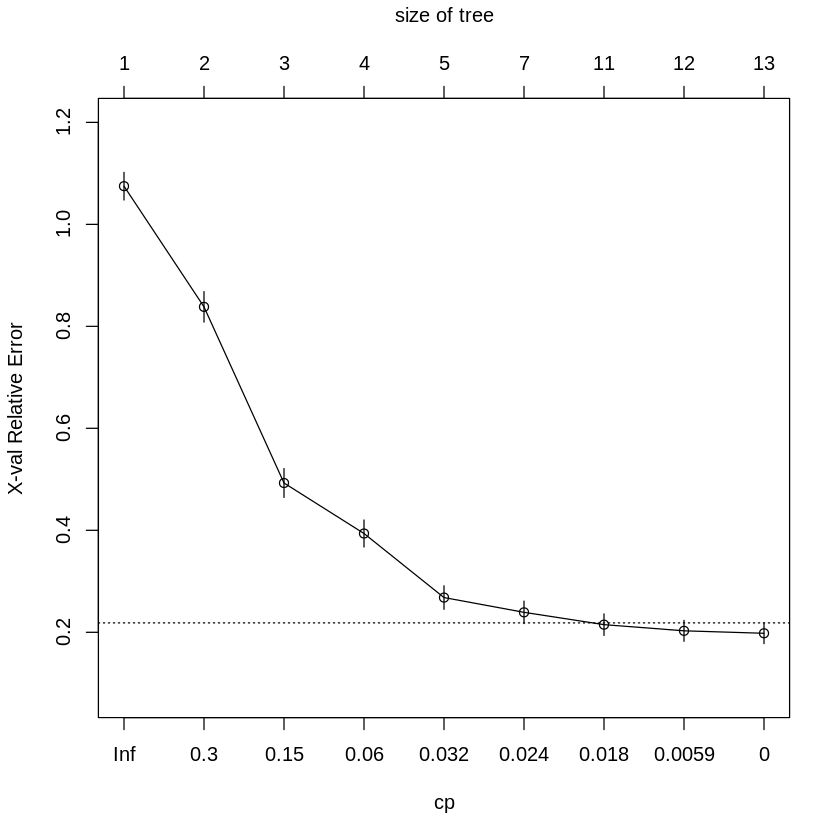

,CP,nsplit,rel error,xerror,xstd
1,0.328502415,0,1.0000000,1.0748792,0.02712628
2,0.268115942,1,0.6714976,0.8381643,0.02988780
3,0.082125604,2,0.4033816,0.4927536,0.02827073
4,0.043478261,3,0.3212560,0.3937198,0.02648381
5,0.024154589,4,0.2777778,0.2681159,0.02306218
6,0.022946860,6,0.2294686,0.2391304,0.02203468
7,0.014492754,10,0.1376812,0.2149758,0.02109136
8,0.002415459,11,0.1231884,0.2028986,0.02058641
9,0.000000000,12,0.1207729,0.1980676,0.02037770


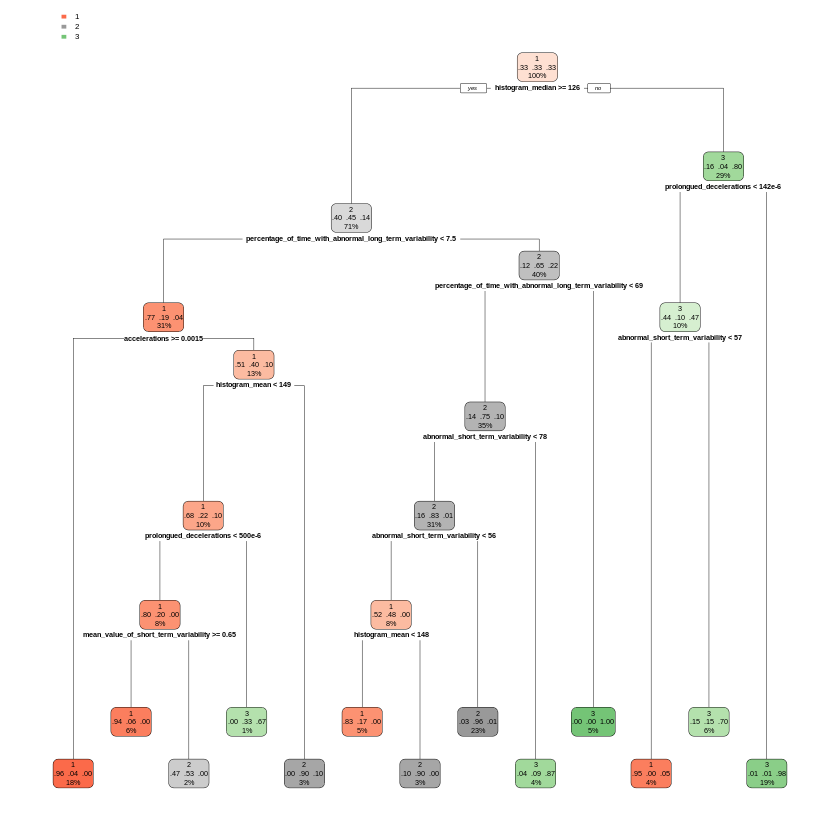

In [ ]:
set.seed(1)

fit_0 <- rpart(fetal_health ~ ., method = "class", data = Train , control = rpart.control(cp = 0))

fit_0 
plotcp(fit_0)
rpart.plot(fit_0)

fit_0$cptable

In [ ]:
predict_unseen0 <-predict(fit_0, Train, type = 'class')
table_mat0 <- table(Train$fetal_health, predict_unseen0) 
table_mat0

   predict_unseen0
      1   2   3
  1 187  19   1
  2   6 200   1
  3   7  10 190

## Prune the tree
The tree pruning is based on the complexity parameter (cp) in rpart is the minimum improvement in the model needed at each node. It’s based on the cost complexity of the model defined as…

$ \sum_{node=1}^{nodes} E_i + \lambda (n_{spits})$

where:

- $E_i$ is the misclassification at every terminal node.
- $n_split$ is number of splits 
- $\lambda$ is a penalty term.

The lambda is determined through cross-validation and not reported in R.
The cp we see using printcp() is the scaled version of lambda over the misclassifcation rate of the overall data.


n= 621 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 621 414 1 (0.33333333 0.33333333 0.33333333)  
   2) histogram_median>=125.8604 443 243 2 (0.40406321 0.45146727 0.14446953)  
     4) percentage_of_time_with_abnormal_long_term_variability< 7.5 193  45 1 (0.76683938 0.19170984 0.04145078)  
       8) accelerations>=0.0015 112   5 1 (0.95535714 0.04464286 0.00000000) *
       9) accelerations< 0.0015 81  40 1 (0.50617284 0.39506173 0.09876543)  
        18) histogram_mean< 148.5 60  19 1 (0.68333333 0.21666667 0.10000000) *
        19) histogram_mean>=148.5 21   2 2 (0.00000000 0.90476190 0.09523810) *
     5) percentage_of_time_with_abnormal_long_term_variability>=7.5 250  87 2 (0.12400000 0.65200000 0.22400000)  
      10) percentage_of_time_with_abnormal_long_term_variability< 68.5 216  53 2 (0.14351852 0.75462963 0.10185185)  
        20) abnormal_short_term_variability< 78.02287 193  32 2 (0.15544041 0.83419689 0.01036269)  
          40) abnorma

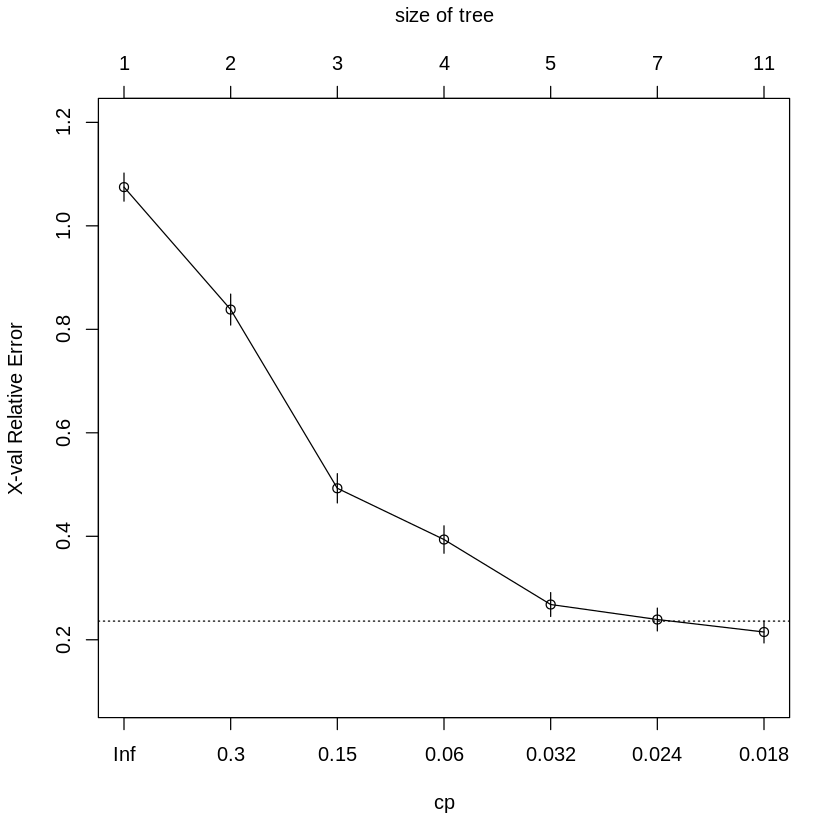

,CP,nsplit,rel error,xerror,xstd
1,0.32850242,0,1.0000000,1.0748792,0.02712628
2,0.26811594,1,0.6714976,0.8381643,0.02988780
3,0.08212560,2,0.4033816,0.4927536,0.02827073
4,0.04347826,3,0.3212560,0.3937198,0.02648381
5,0.02415459,4,0.2777778,0.2681159,0.02306218
6,0.02294686,6,0.2294686,0.2391304,0.02203468
7,0.01449275,10,0.1376812,0.2149758,0.02109136


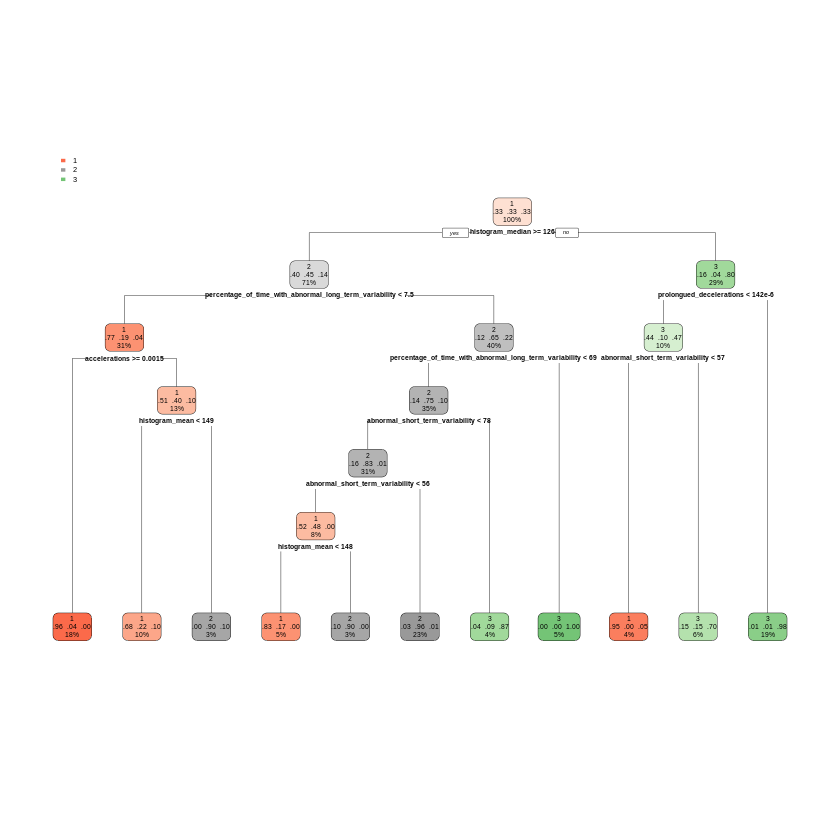

In [ ]:
Pruned_fit_0<-prune(fit_0,cp=0.014492754)

Pruned_fit_0
plotcp(Pruned_fit_0)
rpart.plot(Pruned_fit_0)
Pruned_fit_0$cptable

In [ ]:
predict_unseen_pruned <-predict(Pruned_fit_0, Train, type = 'class')
table_mat1 <- table(Train$fetal_health, predict_unseen_pruned)
table_mat1



   predict_unseen_pruned
      1   2   3
  1 193   6   8
  2  23 175   9
  3   7   4 196

In [ ]:
Evaluate(table_mat1)

        Precision Recall    F1 score 
class 1 0.8654709 0.9323671 0.8976744
class 2 0.9459459 0.8454106 0.8928571
class 3 0.9201878 0.9468599 0.9333333
[1] "accuracy: 0.908212560386473"


##Loss matrix

In [ ]:
lossmatrix <-matrix(c(0,1,1,3,0,1,10,5,0), byrow=TRUE, nrow=3, ncol = 3)
lossmatrix

0,1,1
3,0,1
10,5,0


n= 621 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 621 414 3 (0.333333333 0.333333333 0.333333333)  
   2) histogram_median>=129.9585 410 359 3 (0.402439024 0.473170732 0.124390244)  
     4) percentage_of_time_with_abnormal_long_term_variability< 67.30737 379 275 2 (0.435356201 0.506596306 0.058047493)  
       8) abnormal_short_term_variability< 78.02287 357 184 2 (0.459383754 0.529411765 0.011204482)  
        16) accelerations>=0.0025 96   9 1 (0.968750000 0.031250000 0.000000000) *
        17) accelerations< 0.0025 261  91 2 (0.272030651 0.712643678 0.015325670)  
          34) abnormal_short_term_variability< 42.5 46  30 1 (0.782608696 0.217391304 0.000000000)  
            68) histogram_mean< 149 37   6 1 (0.945945946 0.054054054 0.000000000) *
            69) histogram_mean>=149 9   1 2 (0.111111111 0.888888889 0.000000000) *
          35) abnormal_short_term_variability>=42.5 215  55 2 (0.162790698 0.818604651 0.018604651)  
            70) h


Classification tree:
rpart(formula = fetal_health ~ ., data = Train, method = "class", 
    parms = list(loss = lossmatrix))

Variables actually used in tree construction:
[1] abnormal_short_term_variability                       
[2] accelerations                                         
[3] histogram_mean                                        
[4] histogram_median                                      
[5] percentage_of_time_with_abnormal_long_term_variability
[6] prolongued_decelerations                              

Root node error: 414/621 = 0.66667

n= 621 

        CP nsplit rel error  xerror    xstd
1 0.136071      0   1.00000 7.50000 0.24574
2 0.035024      4   0.38889 1.89130 0.16428
3 0.028986      6   0.31884 1.66425 0.15535
4 0.012077      8   0.26087 0.92029 0.10499
5 0.010000      9   0.24879 0.99034 0.11557


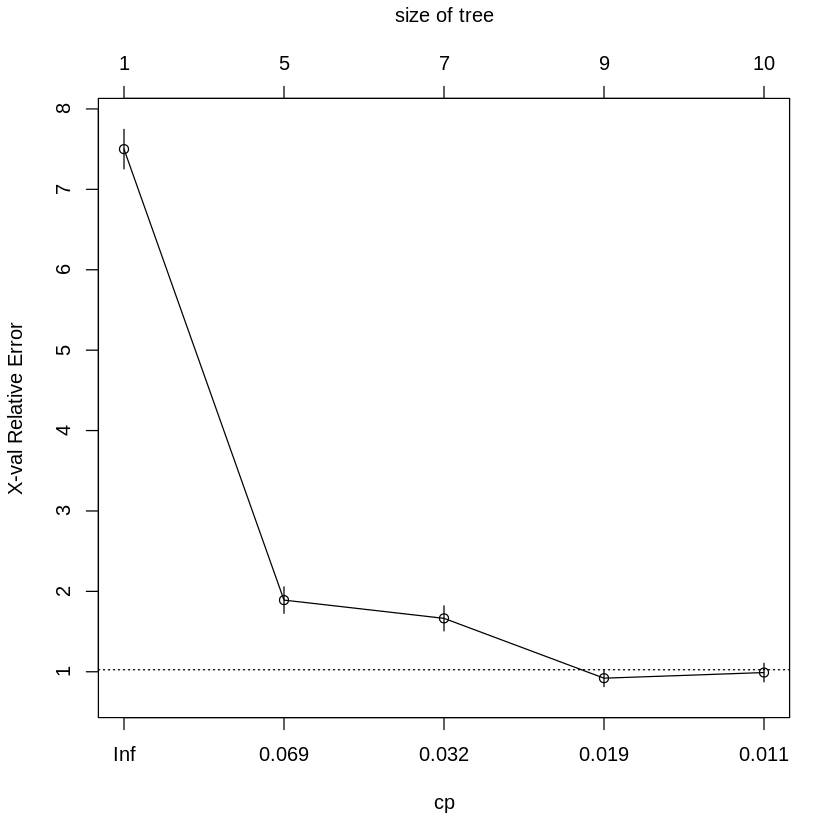

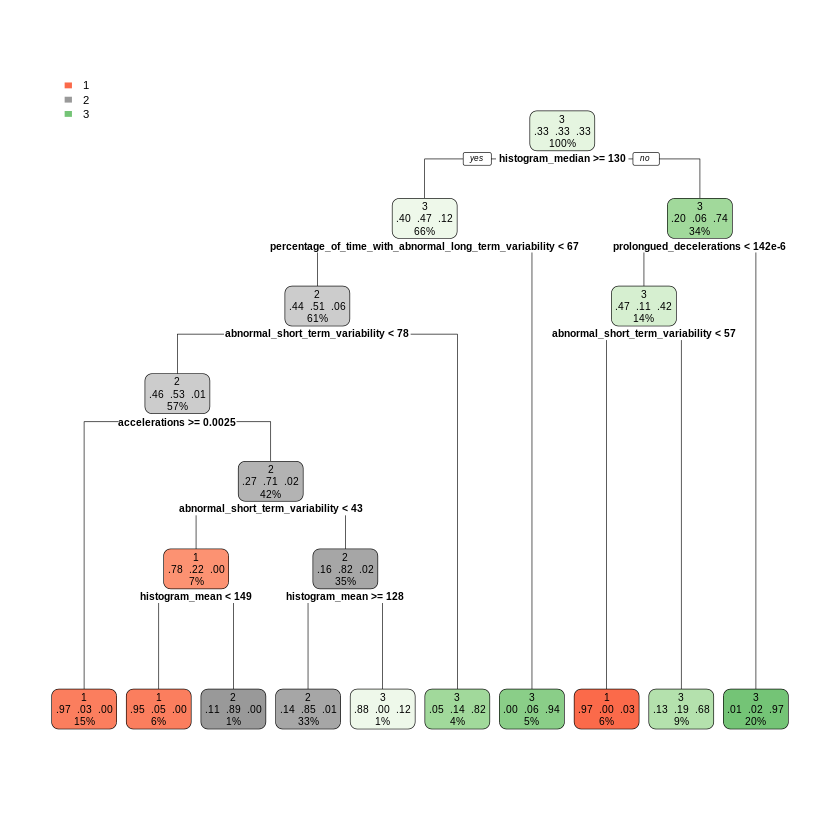

In [ ]:
set.seed(1)
fit_1 <- rpart(fetal_health ~ ., method = "class", data = Train, parms = list(loss = lossmatrix) )

fit_1 
printcp(fit_1)
plotcp(fit_1)
rpart.plot(fit_1)



In [ ]:
predict_unseen1 <-predict(fit_1, Train, type = 'class')
table_1 <- table(Train$fetal_health, predict_unseen1) 
table_1

   predict_unseen1
      1   2   3
  1 162  29  16
  2   5 184  18
  3   1   3 203

In [ ]:
Evaluate(table_1)

        Precision Recall    F1 score 
class 1 0.9642857 0.7826087 0.864    
class 2 0.8518519 0.8888889 0.8699764
class 3 0.8565401 0.9806763 0.9144144
[1] "accuracy: 0.884057971014493"


###Evaluate on test set

In [ ]:
predict_unseen1 <-predict(fit_1, Test, type = 'class')
table_test <- table(Test$fetal_health, predict_unseen1) 
table_test

   predict_unseen1
      1   2   3
  1 349  84  63
  2   4  75   9
  3   0   0  52

In [ ]:
Evaluate(table_test)

        Precision Recall    F1 score 
class 1 0.9886686 0.703629  0.8221437
class 2 0.4716981 0.8522727 0.6072874
class 3 0.4193548 1         0.5909091
[1] "accuracy: 0.748427672955975"


#Random Forest

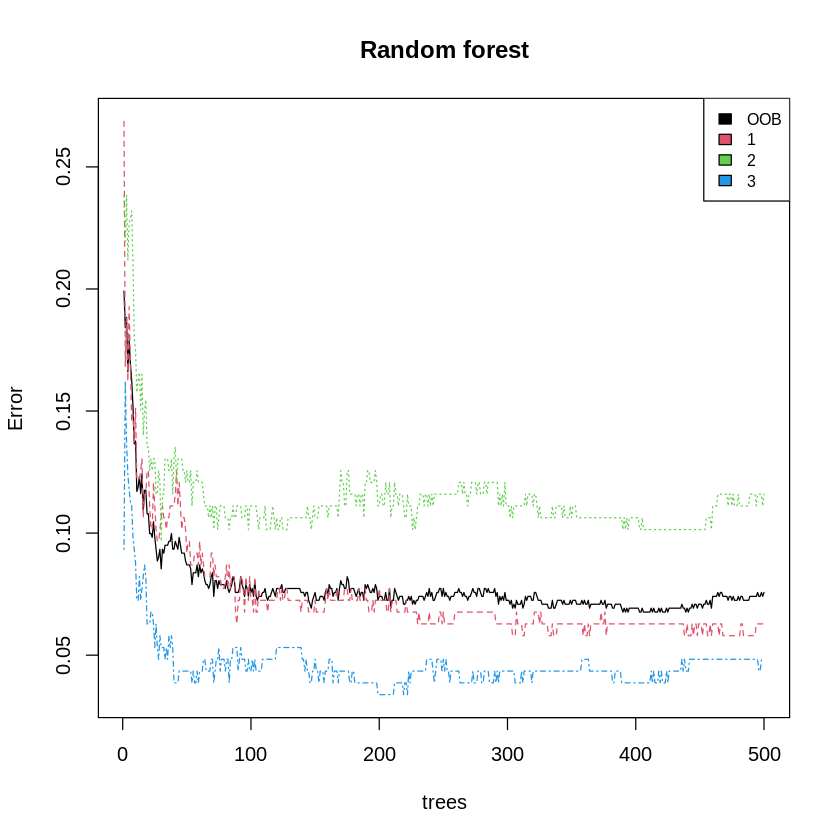

In [ ]:
set.seed(1)

Train_df=data.frame(Train)
RF0 <- randomForest(fetal_health ~ ., data = Train_df, type ='class', ntree = 500, importance = TRUE) 
plot(RF0,  main="Random forest")
legend("topright", colnames(RF0$err.rate),col=1:4,cex=0.8,fill=1:4)



#importance(RF0)

In [ ]:
table_matRF <- table(Train$fetal_health, RF0$predicted)
table_matRF

   
      1   2   3
  1 194  11   2
  2  15 183   9
  3   1   9 197

In [ ]:
Evaluate(table_matRF)


        Precision Recall    F1 score 
class 1 0.9238095 0.9371981 0.9304556
class 2 0.9014778 0.884058  0.8926829
class 3 0.9471154 0.9516908 0.9493976
[1] "accuracy: 0.924315619967794"


mtry = 4  OOB error = 7.73% 
Searching left ...
mtry = 3 	OOB error = 7.73% 
0 0.001 
Searching right ...
mtry = 6 	OOB error = 6.76% 
0.125 0.001 
mtry = 9 	OOB error = 7.09% 
-0.04761905 0.001 


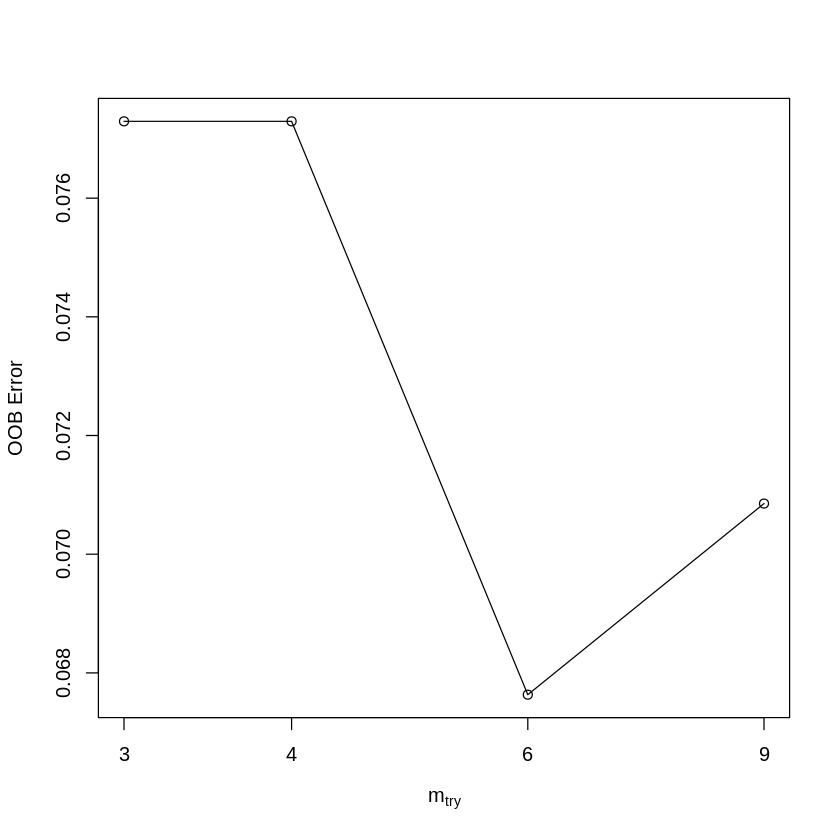

In [ ]:
set.seed(12)
my.mtry <- tuneRF(Train[-22],Train$fetal_health, ntreeTry=500,
stepFactor=1.5,improve=0.001, trace=TRUE, plot=TRUE)

In [ ]:
my.best <- my.mtry[which.min(my.mtry[,2]),1]

In [ ]:
RF1 <- randomForest(fetal_health ~ ., data = Train_df, type ='class', ntree = 500, mtry = my.best, importance = TRUE)

RF1



Call:
 randomForest(formula = fetal_health ~ ., data = Train_df, type = "class",      ntree = 500, mtry = my.best, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 6

        OOB estimate of  error rate: 6.92%
Confusion matrix:
    1   2   3 class.error
1 194  10   3  0.06280193
2  15 186   6  0.10144928
3   1   8 198  0.04347826

In [ ]:
table_matRF1 <- table(Train$fetal_health, RF1$predicted)
table_matRF1


   
      1   2   3
  1 194  10   3
  2  15 186   6
  3   1   8 198

In [ ]:
Evaluate(table_matRF1)

        Precision Recall    F1 score 
class 1 0.9238095 0.9371981 0.9304556
class 2 0.9117647 0.8985507 0.9051095
class 3 0.9565217 0.9565217 0.9565217
[1] "accuracy: 0.930756843800322"


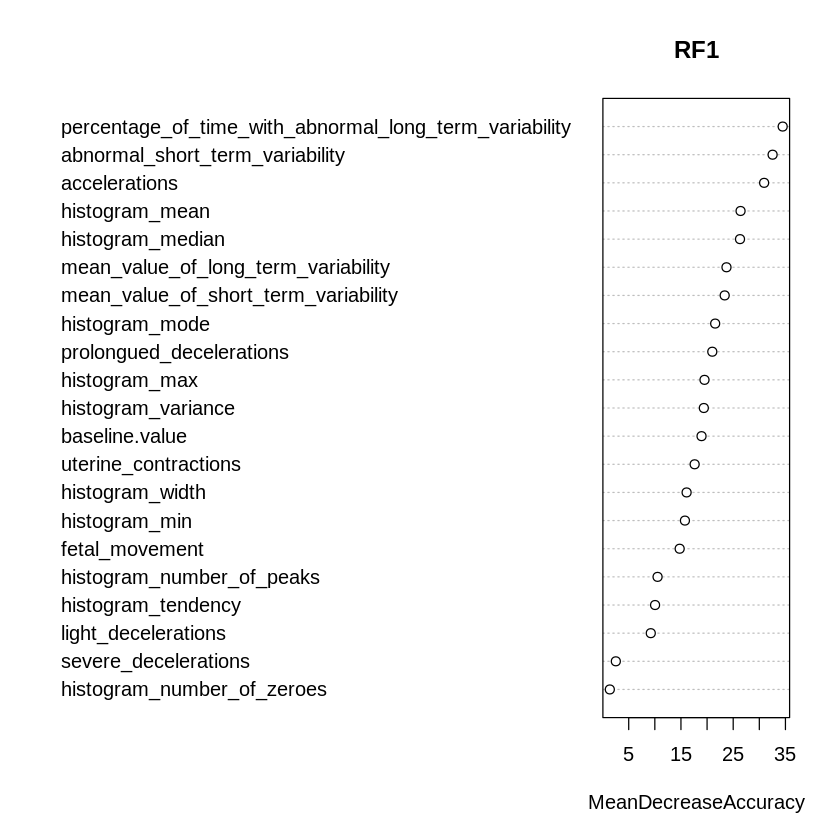

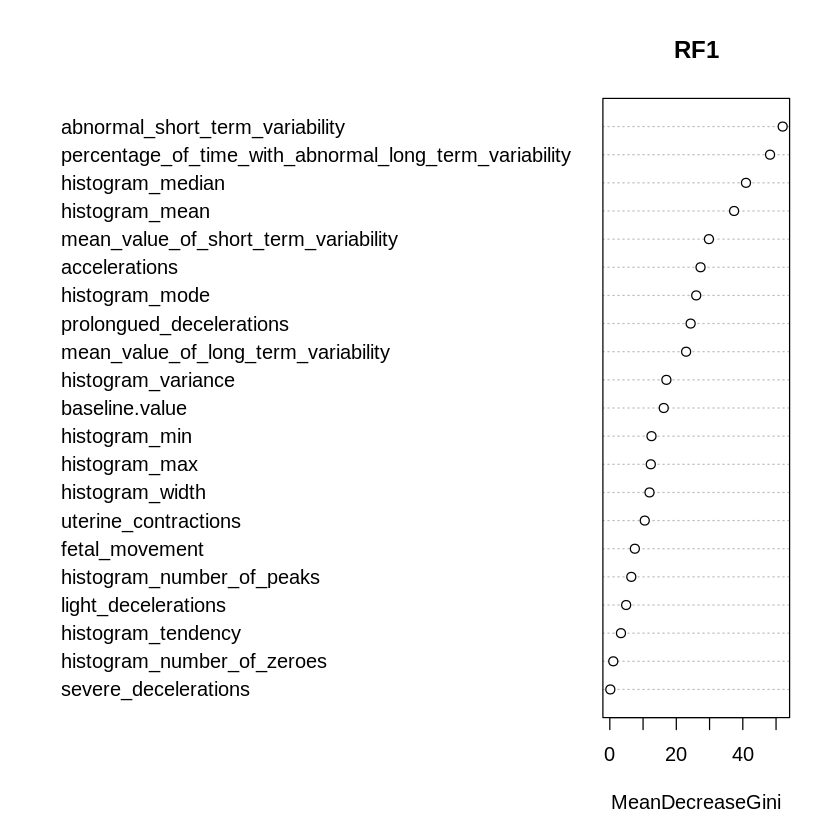

In [ ]:
#Evaluate variable importance

varImpPlot(RF1, sort=T, type = 1)
varImpPlot(RF1, sort=T, type = 2)

###Evaluate on test set

In [ ]:
predict_unseenRF <-predict(RF1, Test, type = 'class')
table_testRF <- table(Test$fetal_health, predict_unseenRF) 
table_testRF

   predict_unseenRF
      1   2   3
  1 437  44  15
  2   6  78   4
  3   0   1  51

In [ ]:
Evaluate(table_testRF)

        Precision Recall    F1 score 
class 1 0.986456  0.8810484 0.9307774
class 2 0.6341463 0.8863636 0.7393365
class 3 0.7285714 0.9807692 0.8360656
[1] "accuracy: 0.889937106918239"
